<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/World_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
happiness = pd.read_csv('/content/combined (World Happiness Data)_combined.csv')
happiness.head()

,Country,Region,reset filters,Year,Corruption Rank,Economy (GDP per Capita),Economy Rank,Freedom Rank,Freedom to make life choices,Generosity,Generosity Rank,Happiness Rank,Happiness Score,Health (Life Expectancy),Health Rank,Perception of Corruption,Social support,Social Support Rank
0,Switzerland,Western Europe,Reset Filters,2015,7.0,1.39651,7,2,0.66557,0.29678,43,1,7.587,0.94143,9,0.41978,1.34951,4
1,Iceland,Western Europe,Reset Filters,2015,60.0,1.30232,22,15,0.62877,0.43630,14,2,7.561,0.94784,7,0.14145,1.40223,1
2,Denmark,Western Europe,Reset Filters,2015,4.0,1.32548,19,7,0.64938,0.34139,29,3,7.527,0.87464,30,0.48357,1.36058,3
3,Norway,Western Europe,Reset Filters,2015,14.0,1.45900,5,1,0.66973,0.34699,26,4,7.522,0.88521,26,0.36503,1.33095,6
4,Canada,North America,Reset Filters,2015,16.0,1.32629,18,13,0.63297,0.45811,13,5,7.427,0.90563,18,0.32957,1.32261,7


In [6]:
happiness.isnull().sum()

,0
Country,0
Region,0
reset filters,0
Year,0
Corruption Rank,1
Economy (GDP per Capita),0
Economy Rank,0
Freedom Rank,0
Freedom to make life choices,0
Generosity,0


In [7]:
happiness.dropna(inplace=True)

In [9]:
happiness.isnull().sum()

,0
Country,0
Region,0
reset filters,0
Year,0
Corruption Rank,0
Economy (GDP per Capita),0
Economy Rank,0
Freedom Rank,0
Freedom to make life choices,0
Generosity,0


In [10]:
# Set Seaborn style for all plots
sns.set(style="whitegrid")

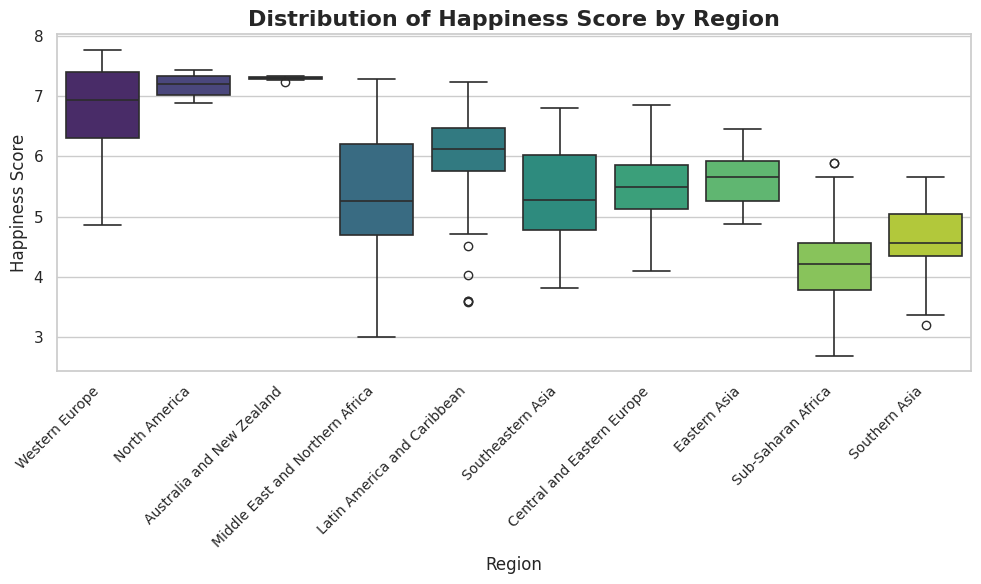

In [13]:
# 1. Happiness Score by Region

# Setting the figure size and theme
plt.figure(figsize=(10, 6))

# Customizing the box plot
sns.boxplot(x='Region', y='Happiness Score', data=happiness, palette="viridis", linewidth=1.2, hue='Region', legend=False)

# Adding titles and labels with larger fonts
plt.title('Distribution of Happiness Score by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

#Analysis to understand why western Europe is more happier than Central and Eastern Europe

In [17]:
# Filter the data for Western Europe and Central & Eastern Europe regions
europe_data = happiness[happiness['Region'].isin(['Western Europe', 'Central and Eastern Europe'])]

# Sort the data by happiness score in descending order within each region
europe_data_sorted = europe_data.sort_values(by=['Region', 'Happiness Score'], ascending=[True, False])

# Select the top 10 happiest countries in each region
top_ten_europe = europe_data_sorted.groupby('Region').head(10).reset_index(drop=True)


In [19]:
happiness.columns

Index(['Country', 'Region', 'reset filters', 'Year', 'Corruption Rank',
       'Economy (GDP per Capita)', 'Economy Rank', 'Freedom Rank',
       'Freedom to make life choices', 'Generosity', 'Generosity Rank',
       'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)',
       'Health Rank', 'Perception of Corruption', 'Social support',
       'Social Support Rank'],
      dtype='object')

##Visualizing Key Happiness Factors for Western vs. Central & Eastern Europe

<ipython-input-45-6c2948dde5ab>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness Score', data=top_ten_europe, palette="pastel")
<ipython-input-45-6c2948dde5ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Economy (GDP per Capita)', data=top_ten_europe, palette="Blues")
<ipython-input-45-6c2948dde5ab>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Health (Life Expectancy)', data=top_ten_europe, palette="Greens")
<ipython-input-45-6c2948dde5ab>:22: FutureWarning: 

Passing `palette

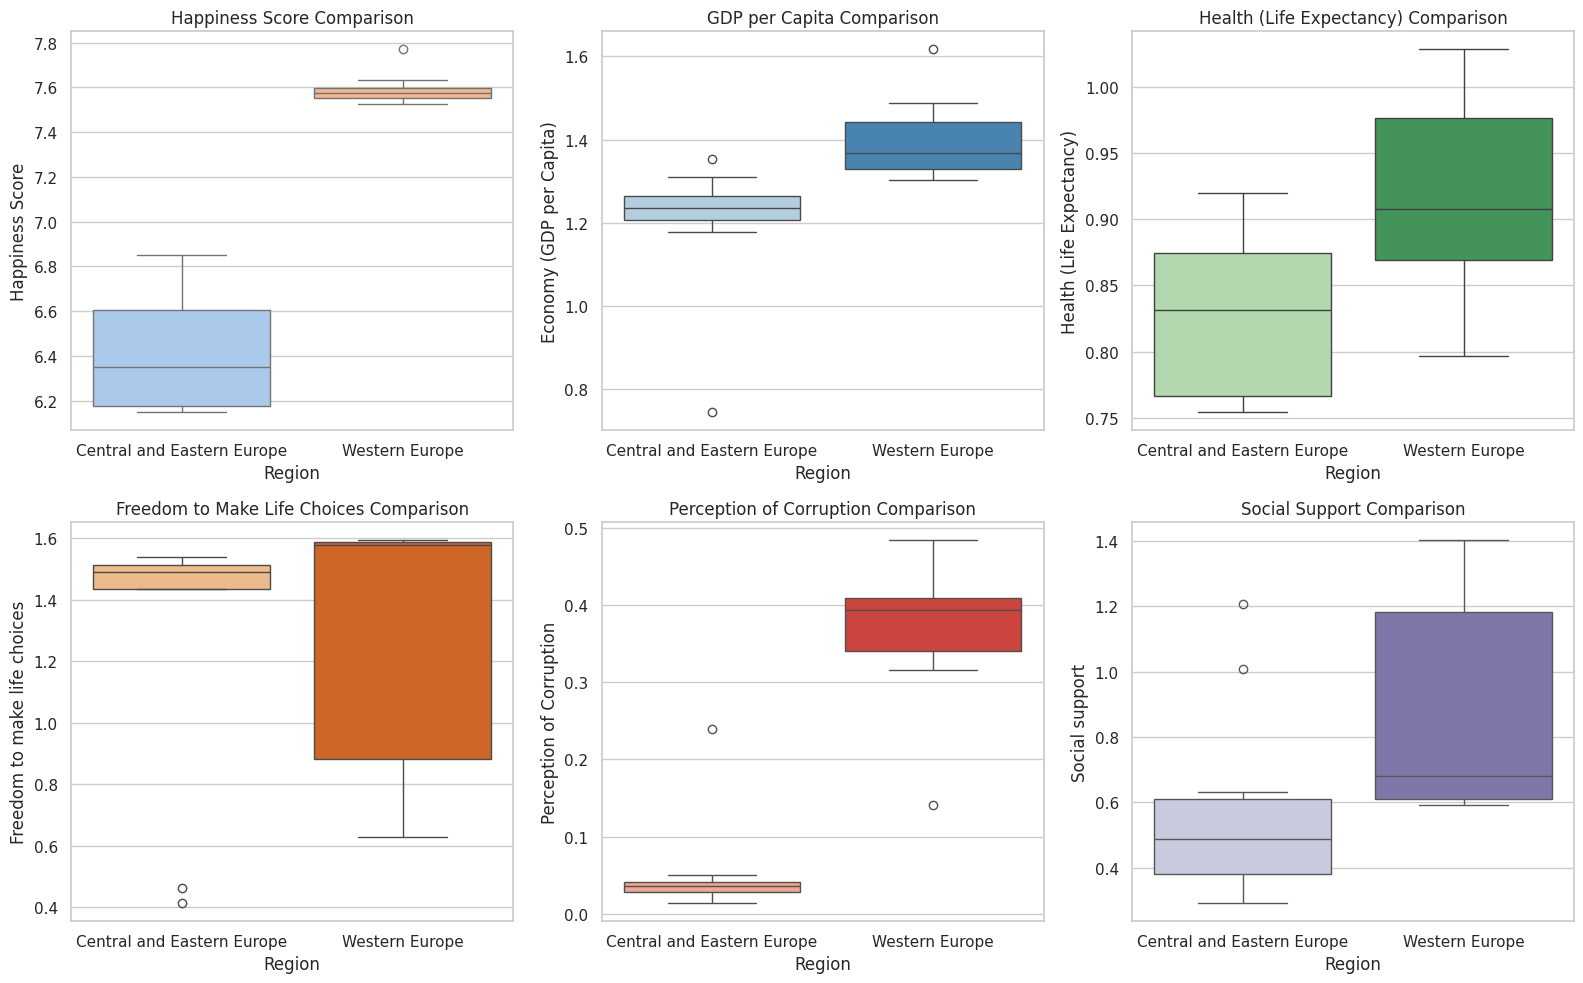

In [45]:
# Set the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Happiness Score Comparison
plt.subplot(2, 3, 1)
sns.boxplot(x='Region', y='Happiness Score', data=top_ten_europe, palette="pastel")
plt.title('Happiness Score Comparison')

# Economy (GDP per Capita) Comparison
plt.subplot(2, 3, 2)
sns.boxplot(x='Region', y='Economy (GDP per Capita)', data=top_ten_europe, palette="Blues")
plt.title('GDP per Capita Comparison')

# Health (Life Expectancy) Comparison
plt.subplot(2, 3, 3)
sns.boxplot(x='Region', y='Health (Life Expectancy)', data=top_ten_europe, palette="Greens")
plt.title('Health (Life Expectancy) Comparison')

# Freedom to Make Life Choices Comparison
plt.subplot(2, 3, 4)
sns.boxplot(x='Region', y='Freedom to make life choices', data=top_ten_europe, palette="Oranges")
plt.title('Freedom to Make Life Choices Comparison')

# Perception of Corruption Comparison
plt.subplot(2, 3, 5)
sns.boxplot(x='Region', y='Perception of Corruption', data=top_ten_europe, palette="Reds")
plt.title('Perception of Corruption Comparison')

# Social Support Comparison
plt.subplot(2, 3, 6)
sns.boxplot(x='Region', y='Social support', data=top_ten_europe, palette="Purples")
plt.title('Social Support Comparison')

plt.tight_layout()
plt.show()

#Analysis for Sub-Saharan-Africa countries

In [29]:
# Filter the data for Sub-Saharan Africa only
sub_saharan_africa_data = happiness[happiness['Region'] == 'Sub-Saharan Africa']

# Display the first few rows to verify
sub_saharan_africa_data.head()

,Country,Region,reset filters,Year,Corruption Rank,Economy (GDP per Capita),Economy Rank,Freedom Rank,Freedom to make life choices,Generosity,Generosity Rank,Happiness Rank,Happiness Score,Health (Life Expectancy),Health Rank,Perception of Corruption,Social support,Social Support Rank
70,Mauritius,Sub-Saharan Africa,Reset Filters,2015,107.0,1.00761,66,35,0.56066,0.37744,22,71,5.477,0.70950,75,0.07521,0.98521,92
77,Nigeria,Sub-Saharan Africa,Reset Filters,2015,134.0,0.65435,108,112,0.34334,0.27233,51,78,5.268,0.16007,149,0.04030,0.90432,112
84,Zambia,Sub-Saharan Africa,Reset Filters,2015,70.0,0.47038,122,60,0.48827,0.19591,91,85,5.129,0.29924,138,0.12468,0.91612,107
90,Somaliland region,Sub-Saharan Africa,Reset Filters,2015,9.0,0.18847,150,69,0.46582,0.50318,6,91,5.057,0.43873,119,0.39928,0.95152,100
93,Mozambique,Sub-Saharan Africa,Reset Filters,2015,50.0,0.08308,152,113,0.34037,0.22269,74,94,4.971,0.09131,153,0.15603,1.02626,80


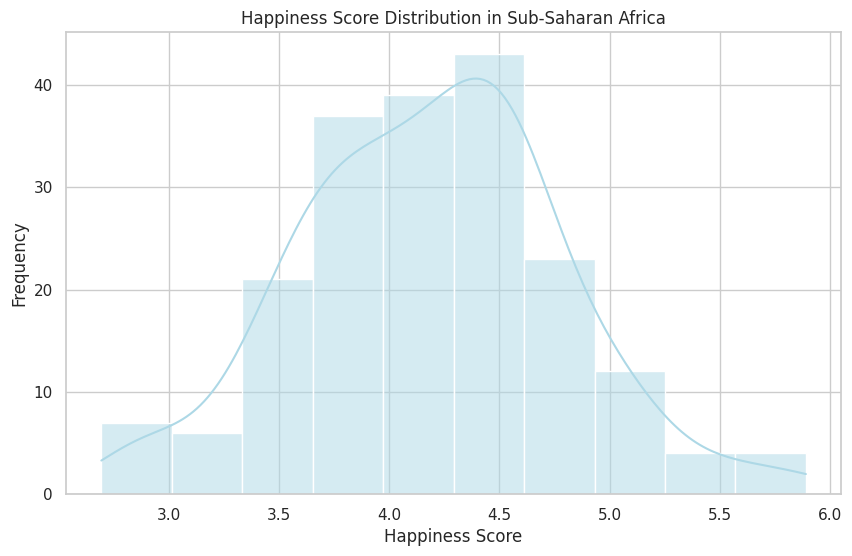

In [30]:
#Happiness Score Distribution in Sub-Saharan Africa

plt.figure(figsize=(10, 6))
sns.histplot(sub_saharan_africa_data['Happiness Score'], bins=10, kde=True, color="lightblue")
plt.title('Happiness Score Distribution in Sub-Saharan Africa')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


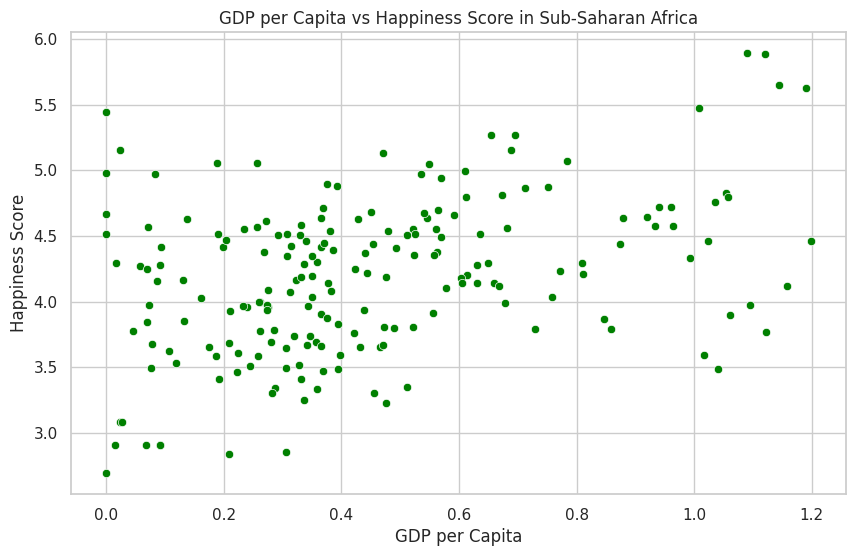

In [31]:
# Plotting GDP per Capita vs Happiness Score for Sub-Saharan Africa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=sub_saharan_africa_data, color='green')
plt.title('GDP per Capita vs Happiness Score in Sub-Saharan Africa')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


##Happiest countries in Africa

<ipython-input-36-f63b7ab816c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=top_10_happiest_african_countries, palette='viridis')


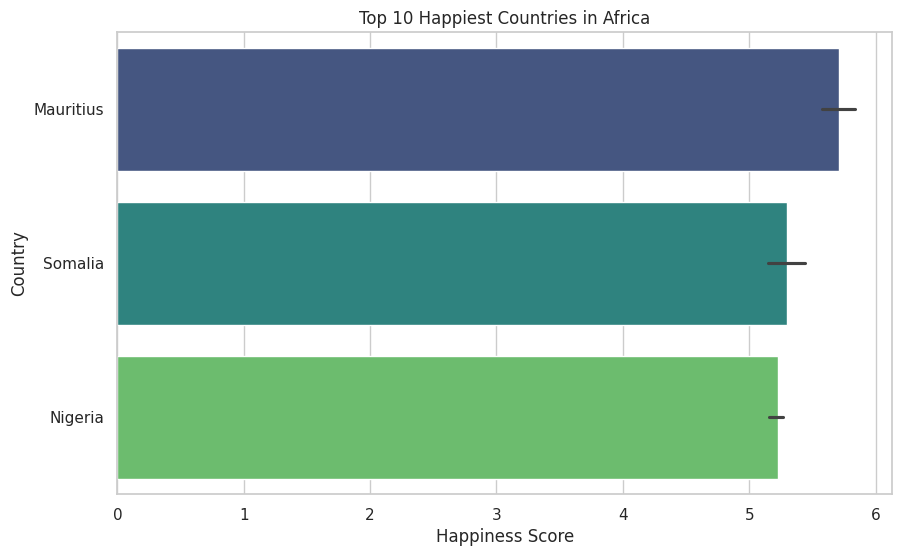

In [36]:
# Filter the data for African countries only (Sub-Saharan Africa and Middle East and Northern Africa)
african_countries_data = happiness[happiness['Region'].isin(['Sub-Saharan Africa'])]

# Sort the countries by Happiness Score in descending order
sorted_african_countries = african_countries_data.sort_values(by='Happiness Score', ascending=False)

# Get the top 10 happiest countries
top_10_happiest_african_countries = sorted_african_countries[['Country', 'Happiness Score']].head(10)

# Plot the top 10 happiest countries in Africa
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness Score', y='Country', data=top_10_happiest_african_countries, palette='viridis')
plt.title('Top 10 Happiest Countries in Africa')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


In [34]:
# Check how many rows are in the African dataset
african_countries_data = happiness[happiness['Region'].isin(['Sub-Saharan Africa', 'Middle East and Northern Africa'])]
print(f"Number of countries in Africa: {african_countries_data.shape[0]}")

# Check for missing Happiness Scores
print(african_countries_data[['Country', 'Happiness Score']].isnull().sum())


Number of countries in Africa: 291
Country            0
Happiness Score    0
dtype: int64


##Least hapiesr countries in Africa

<ipython-input-38-804cad06c56f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=bottom_10_happiest_african_countries, palette='coolwarm')


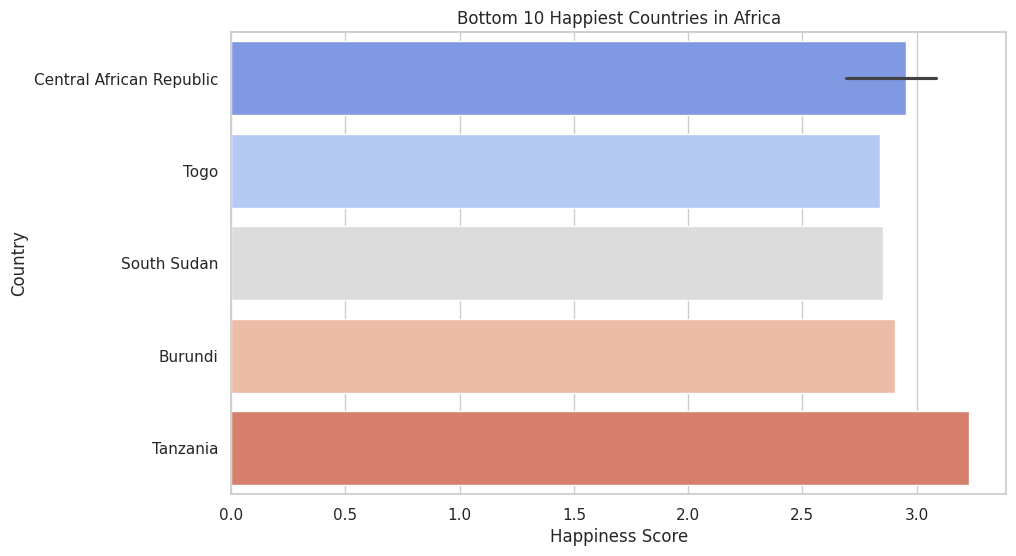

In [38]:
# Filter the data for African countries only (Sub-Saharan Africa and Middle East and Northern Africa)
african_countries_data = happiness[happiness['Region'].isin(['Sub-Saharan Africa'])]

# Remove rows with missing Happiness Scores if any
african_countries_data = african_countries_data.dropna(subset=['Happiness Score'])

# Sort the countries by Happiness Score in ascending order (bottom happiest first)
sorted_african_countries_bottom = african_countries_data.sort_values(by='Happiness Score', ascending=True)

# Get the bottom 10 happiest countries (least happy)
bottom_10_happiest_african_countries = sorted_african_countries_bottom[['Country', 'Happiness Score']].head(10)

# Plot the bottom 10 happiest countries in Africa
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness Score', y='Country', data=bottom_10_happiest_african_countries, palette='coolwarm')
plt.title('Bottom 10 Happiest Countries in Africa')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


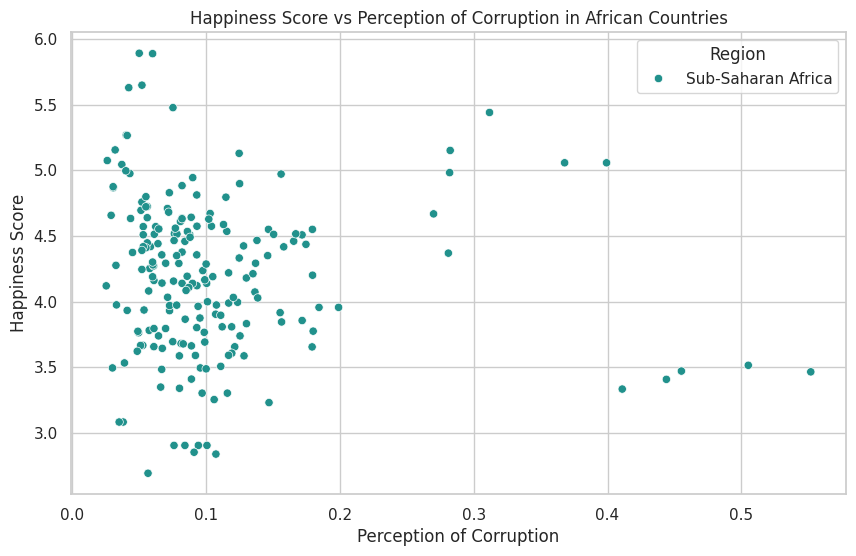

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Perception of Corruption', y='Happiness Score', data=african_countries_data, hue='Region', palette='viridis')
plt.title('Happiness Score vs Perception of Corruption in African Countries')
plt.xlabel('Perception of Corruption')
plt.ylabel('Happiness Score')
plt.show()


               Country  Perception of Corruption
153             Rwanda                   0.55191
309             Rwanda                   0.50521
465             Rwanda                   0.45522
620             Rwanda                   0.44400
777             Rwanda                   0.41100
90   Somaliland region                   0.39928
254  Somaliland Region                   0.36794
233            Somalia                   0.31180
407            Somalia                   0.28241
567            Somalia                   0.28200


<ipython-input-41-a1d2119c6cbd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perception of Corruption', y='Country', data=top_10_most_corrupt, palette='Reds')


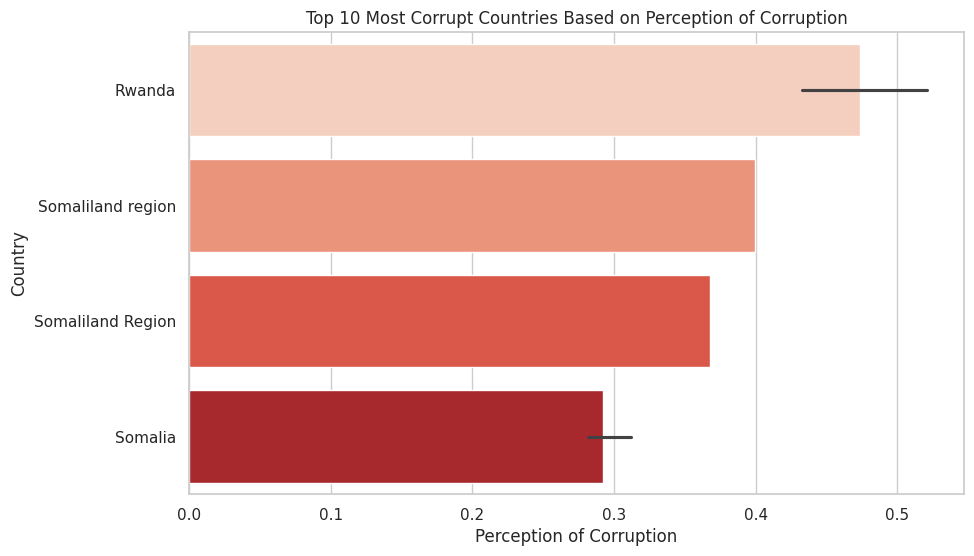

In [41]:
# Sort the data by 'Perception of Corruption' in descending order to get the most corrupt countries
sorted_by_corruption = african_countries_data.sort_values(by='Perception of Corruption', ascending=False)

# Select the top N most corrupt countries (e.g., top 10)
top_10_most_corrupt = sorted_by_corruption[['Country', 'Perception of Corruption']].head(10)

# Display the top 10 most corrupt countries
print(top_10_most_corrupt)

# Plot the top 10 most corrupt countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Perception of Corruption', y='Country', data=top_10_most_corrupt, palette='Reds')
plt.title('Top 10 Most Corrupt Countries Based on Perception of Corruption')
plt.xlabel('Perception of Corruption')
plt.ylabel('Country')
plt.show()


Outlier Countries in Sub-Saharan Africa based on Happiness Score:
       Country  Happiness Score
524  Mauritius            5.891
682  Mauritius            5.888


<ipython-input-42-03a445dcfd14>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness Score', data=sub_saharan_africa_data, palette='Set3')


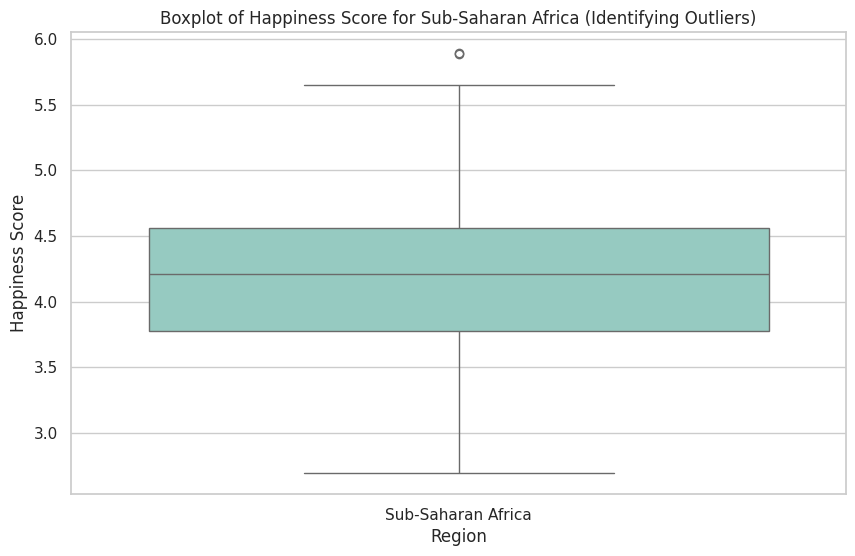

In [42]:
# Step 1: Filter Sub-Saharan Africa data
sub_saharan_africa_data = african_countries_data[african_countries_data['Region'] == 'Sub-Saharan Africa']

# Step 2: Calculate the IQR for Happiness Score (or any other metric you're interested in)
Q1 = sub_saharan_africa_data['Happiness Score'].quantile(0.25)
Q3 = sub_saharan_africa_data['Happiness Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
outliers = sub_saharan_africa_data[(sub_saharan_africa_data['Happiness Score'] < lower_bound) |
                                   (sub_saharan_africa_data['Happiness Score'] > upper_bound)]

# Step 4: Display outliers
print("Outlier Countries in Sub-Saharan Africa based on Happiness Score:")
print(outliers[['Country', 'Happiness Score']])

# Step 5: Visualize using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Happiness Score', data=sub_saharan_africa_data, palette='Set3')
plt.title('Boxplot of Happiness Score for Sub-Saharan Africa (Identifying Outliers)')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()


##Analysis to understand why Mauritius and Somalia are happier than Kenya

       Country  Happiness Score  Economy (GDP per Capita)  Social support  \
70   Mauritius            5.477                  1.007610        0.985210   
124      Kenya            4.419                  0.364710        0.998760   
223  Mauritius            5.648                  1.143720        0.756950   
233    Somalia            5.440                  0.000000        0.336130   
279      Kenya            4.356                  0.522670        0.762400   
378  Mauritius            5.629                  1.189396        0.491247   
407    Somalia            5.151                  0.022643        0.602127   
426      Kenya            4.553                  0.560479        0.452764   
524  Mauritius            5.891                  1.090000        0.584000   
567    Somalia            4.982                  0.000000        0.674000   
593      Kenya            4.410                  0.493000        0.504000   
682  Mauritius            5.888                  1.120000        0.498000   

<ipython-input-43-88ad339861f3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Happiness Score', data=comparison_data, palette='viridis')
<ipython-input-43-88ad339861f3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Economy (GDP per Capita)', data=comparison_data, palette='viridis')
<ipython-input-43-88ad339861f3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Social support', data=comparison_data, palette='viridis')
<ipython-input-43-88ad339861f3>:28: FutureWarning: 

Passing `palett

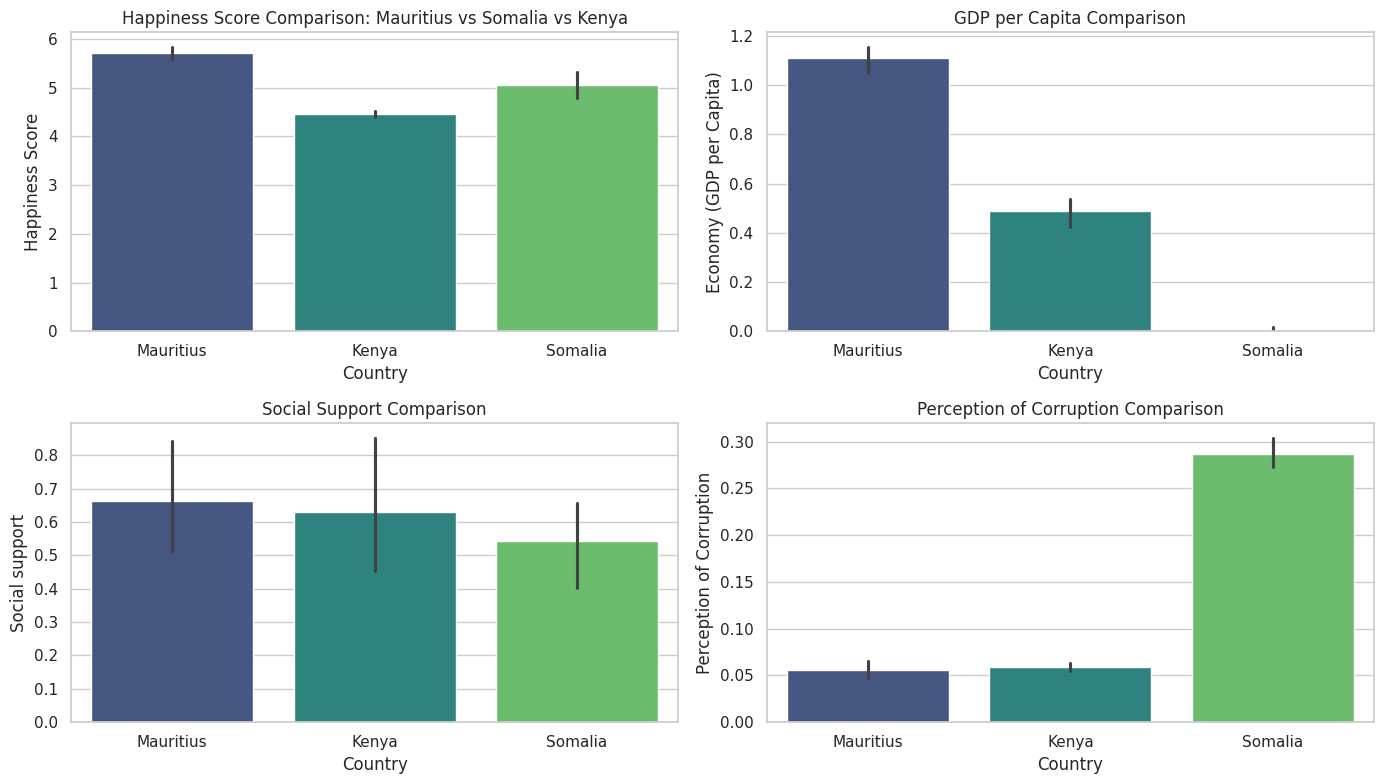

In [43]:
# Filter data for Mauritius, Somalia, and Kenya
countries_to_compare = ['Mauritius', 'Somalia', 'Kenya']
comparison_data = african_countries_data[african_countries_data['Country'].isin(countries_to_compare)]

# Display the data for comparison
print(comparison_data[['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)', 'Freedom to make life choices', 'Perception of Corruption']])

# Plotting the comparison for multiple factors
plt.figure(figsize=(14, 8))

# Plot Happiness Score comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Country', y='Happiness Score', data=comparison_data, palette='viridis')
plt.title('Happiness Score Comparison: Mauritius vs Somalia vs Kenya')

# Plot GDP per Capita comparison
plt.subplot(2, 2, 2)
sns.barplot(x='Country', y='Economy (GDP per Capita)', data=comparison_data, palette='viridis')
plt.title('GDP per Capita Comparison')

# Plot Social Support comparison
plt.subplot(2, 2, 3)
sns.barplot(x='Country', y='Social support', data=comparison_data, palette='viridis')
plt.title('Social Support Comparison')

# Plot Perception of Corruption comparison
plt.subplot(2, 2, 4)
sns.barplot(x='Country', y='Perception of Corruption', data=comparison_data, palette='viridis')
plt.title('Perception of Corruption Comparison')

plt.tight_layout()
plt.show()
